# Representing Multi-Qubit States

We saw that a single bit has two possible states and a qubit state has two complex amplitudes. Siimilarly, two bits have four possible states:

00, 01, 10, 11.

And to describe that state of two qubits requires four complex amplitudes. We store these amplitudes in a 4D-vector.

$|a\rangle = a_{00}|00\rangle + a_{01}|01\rangle + a_{10}|10+a_{11}|11\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11}\end{bmatrix}$

The vector above is normalized.

The rules of measurement still work in the same way:

$p(|00\rangle) =|\langle00|a\rangle|^2=|a_{00}|^2$

If we have two seperated qubits, we can describe their collective state using the kronecker product:


<img src="qubitm.png" width = 400 />

If we have n qubits, we will have to keep track of $2^n$ complex amplitudes. These vectors grow exponentially with the number of qubits. This is the reason quantum computers with large numbers of qubits are so difficult to simulate. A modern laptop can easily simulate a general quantum state of arond 20 qubits, but simulating 100 qubits is too difficult even for the largest supercomputers. 

In [1]:
from qiskit import QuantumCircuit, Aer, assemble
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

In [2]:
qc = QuantumCircuit(3)

for qubit in range(3):
    qc.h(qubit) #Hadamard gate
qc.draw()


┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘

Each qubit is in the state $|+\rangle$ since $H|0\rangle=|+\rangle$

The collective state of the three $|+\rangle$ gates is thus:

<img src="hadabard.png" width = 200 />

In [3]:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

# Single Qubit Gates on Multi-Qubit Statevectors

<img src=xgate.png width = 500/>

In [49]:
qc2 = QuantumCircuit(2)
qc2.h(0)
qc2.x(1)
qc2.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

We can represent the simultaneous operations using their kronceker product:

$X|q_1\rangle \otimes H|q_0\rangle = (X \otimes H)|q_1q_0\rangle$

<img src = multigate.png width = 400/>



In [ ]:
usim = Aer.get_backend('aer_simulator')
qc2.save_unitary()
qobj = assemble(qc2)
unitary = usim.run(qobj).result().get_unitary()

In [ ]:
qc.draw()

In [ ]:
print(unitary) #Array to latex not working

In [ ]:
qc = QuantumCircuit(2)
qc.x(1)
qc.draw()

In [ ]:
# Simulate the unitary
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
# Display the results:
print(unitary)

In [ ]:
qc = QuantumCircuit(2)
qc.x(1)
qc.draw()

If we want to apply a gate to only one qubit at a time, we describe this using kronecker product with the identity matrix

In [ ]:
# Simulate the unitary
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
# Display the results:
print(unitary)

# Multi-Qubit Gates

## The CNOT Gate

This is the conditional gate that performs an X-gate on the second qubit if the state of the first qubit (control) is $|1\rangle$

In [ ]:
qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.draw()

When our qbits are classical bits, it is very easy to understand. But what our multiple qubits?

<img src = cnots.png width =500/>

In [35]:
qc = QuantumCircuit(2)
qc.h(0)
qc.draw()

┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────

In [36]:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
# Print the statevector neatly:
print(final_state)

Statevector([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j],
            dims=(2, 2))


<img src=cnots2.png width =500/>

In [40]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [41]:
# Let's get the result:
qc.save_statevector()
qobj = assemble(qc)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
print(final_state)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


<img src = cnotentangled.png width = 500/>

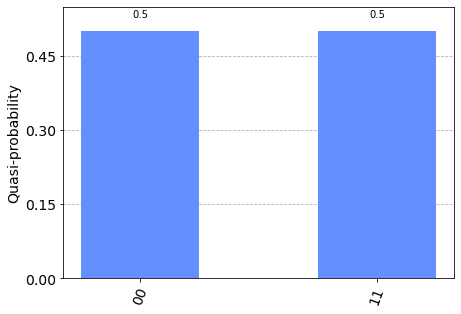

In [43]:
plot_histogram(result.get_counts())


In the section above we saw the Bell entangled state that has a 50 percent probability of being 0 and 50 percent probability of being 1.This combined state cannot be written as two separate qubit states, which has interesting implications. Although our qubits are in superposition, measuring one will tell us the state of the other and collapse its superposition.

Even if we separated these qubits light-years away, measuring one qubit collapses the superposition and appears to have an immediate effect on the other. This is the ‘spooky action at a distance’ that upset so many physicists in the early 20th century.

It’s important to note that the measurement result is random, and the measurement statistics of one qubit are not affected by any operation on the other qubit. Because of this, there is no way to use shared quantum states to communicate. This is known as the no-communication theorem.